In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


/jet/home/mtaylor5/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/jet/home/mtaylor5/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(0, 0.5, 'Runtime (sec)')

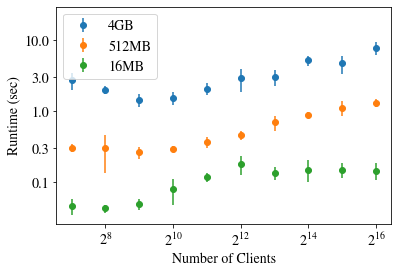

In [5]:
# PLOT 1 for the paper

fig, ax = plt.subplots()


### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
ax.errorbar(summary_data['#BC'][3:13], summary_data.iloc[3:13, 1:].mean(axis=1), yerr=summary_data.iloc[3:13, 1:].std(axis=1), fmt='o')
#plt.plot(summary_data['#BC'], 4/summary_data.iloc[:, 1:].mean(axis=1))


summary_file1 = '/jet/home/mtaylor5/ckio-testsuite/basic-chare-benchmarks/bridges/results/512MB_32tasks_16nodes/summary.out'
summary_file2 = '/jet/home/mtaylor5/ckio-testsuite/basic-chare-benchmarks/bridges/results/16MB_32tasks_16nodes/summary.out'
summary_file3 = '/jet/home/mtaylor5/ckio-testsuite/basic-chare-benchmarks/bridges/results/1MB_32tasks_16nodes/summary.out'



for summary_file in [summary_file1, summary_file2]:
    # read data in format (chares, 10 runs)
    summary_data = pd.read_csv(summary_file, sep=' ', header=None)
    summary_data.columns = ['#PEs', '#BC', 'Time']

    # plt standard dev error bars
    grouped = summary_data.groupby('#BC').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')



# Set the y-axis to log scale
ax.set_yscale('log')
ax.set_xscale('log', basex=2)
ax.set_ylim([0, 30])

ax.set_yticks([ 0.1, .3, 1, 3, 10])

ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# plot setup
ax.legend(['4GB', '512MB', '16MB', '1MB'])

# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left=False,      # ticks along the bottom edge are off
#     right=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

# remove intermediate tick marks from the y axis


plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title("Naive Overdecomposed Input on Bridges2")

/jet/home/mtaylor5/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


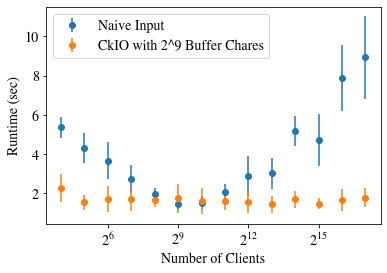

In [3]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO on bridges

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')
#plt.plot(summary_data['#BC'], 4/summary_data.iloc[:, 1:].mean(axis=1))


ckio_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')



# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])




/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


Text(0.5, 1.0, '2^9MB, 64 nodes, 2^12 PEs ')

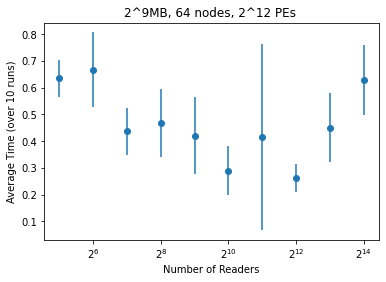

In [4]:

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/results/512MB_64nodes_64tasks/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#readers', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#readers'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# create new column that is the average of columns 1-10
# plot the same data but as inverse, 512 / value
#
# plt.plot(summary_data['#readers'], .5/summary_data.iloc[:, 1:].mean(axis=1))

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Readers')
plt.ylabel('Average Time (over 10 runs)')
plt.title("2^9MB, 64 nodes, 2^12 PEs ")

/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


Text(0, 0.5, 'Average Time (over 10 runs)')

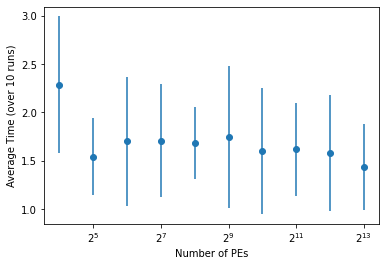

In [5]:
### plot basic summary data as PEs vs average time (with error bars) ###
summary_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#PEs'], summary_data.iloc[:, 2:].mean(axis=1), yerr=summary_data.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of PEs')
plt.ylabel('Average Time (over 10 runs)')

In [11]:

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB_BG/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#readers', "#BC", 'bg', 'total']

# group by number of readers and number of BC
summary_data = summary_data.groupby(['#readers', '#BC']).mean().reset_index()
print(summary_data)

# print to a text file
print(summary_data.to_string())


   #readers  #BC        bg     total
0        32  512  1.717357  1.769273
1        64  512  1.380348  1.425799
2       128  512  1.391785  1.438460
3       256  512  1.558141  1.603841
4       512  512  1.456631  1.501438
5      1024  512  1.456803  1.505231
6      2048  512  1.352156  1.396921
7      4096  512  1.407051  1.453916
8      8192  512  1.194008  1.238981
9     16384  512  1.099130  1.140232
   #readers  #BC        bg     total
0        32  512  1.717357  1.769273
1        64  512  1.380348  1.425799
2       128  512  1.391785  1.438460
3       256  512  1.558141  1.603841
4       512  512  1.456631  1.501438
5      1024  512  1.456803  1.505231
6      2048  512  1.352156  1.396921
7      4096  512  1.407051  1.453916
8      8192  512  1.194008  1.238981
9     16384  512  1.099130  1.140232


In [39]:
### plot basic summary data as PEs vs average time (with error bars) ###
summary_file1 = '/jet/home/mtaylor5/ckio-testsuite/basic-chare-benchmarks/results/1GB_32tasks_64nodes/summary.out'
summary_file2 = '/jet/home/mtaylor5/ckio-testsuite/basic-chare-benchmarks/results/512MB_32tasks_64nodes/summary.out'

for summary_file in [summary_file1, summary_file2]:
    # read data in format (chares, 10 runs)
    summary_data = pd.read_csv(summary_file, sep=' ', header=None)
    summary_data.columns = ['#PEs', '#BC', 'Time']

    # plt standard dev error bars
    grouped = summary_data.groupby('#BC').agg(['mean', 'std'])
    plt.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')


# plot setup
plt.legend(['1GB, 64 nodes, 2^11 PEs', '512MB, 64 nodes, 2^11 PEs'])
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xlabel('Number of Clients')
plt.ylabel('Average Time (over 10 runs)')
plt.title("1GB, 64 nodes, 2^11 PEs")

/jet/home/mtaylor5/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/jet/home/mtaylor5/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


Text(0.5, 1.0, '1GB, 64 nodes, 2^11 PEs')

RuntimeError: latex was not able to process the following string:
b'1GB, 64 nodes, 2^11 PEs'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/jet/home/mtaylor5/.cache/matplotlib/tex.cache/360c14909a7f86056294ce3930f89f7
6.tex
LaTeX2e <2017-04-15>
Babel <3.17> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 360c14909a7f86056294ce3930f89f76.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily 1GB, 64 nodes, 2^
                                 11 PEs}
No pages of output.
Transcript written on 360c14909a7f86056294ce3930f89f76.log.




<Figure size 1980x1500 with 1 Axes>